## Optical Wave Breaking simulation

#### Using the book Agrawal Nonlinear Fiber Optics 

Ch.4. Pages: 100-103

Uses Luna.jl for the simulation.
More about Luna.jl here: https://github.com/LupoLab/Luna.jl


In [1]:
using Luna

Simulating the the Optical Wave Breaking 

In [28]:
# for writing greek symbols: 
using Pkg; 
Pkg.instantiate()

In [106]:
τ0=100e-15     # s, pulse duration 
N=30

# P0=5e3         # W, 
γ=0.1         # /w/m,  gamma

β2=2e-24      # s^2/m, nonlinear coefficient 

LD=T0^2/abs(β2)

P0=N^2*abs(β2)/(γ*T0^2)

τfwhm = (2*log(1 + sqrt(2)))*τ0

flength=0.1*LD   # m, fiber length 


λ0=800e-9     # central wavelength 
d0=λ0/1.5
λlims=[λ0-d0, λ0+d0]    # wavelength limit 

βs=[0.0, 0.0, β2]   # Taylor expansion of the propagation constant about λ0

trange=8e-13        # s,  total width of time grid 

output=prop_gnlse(γ, flength, βs; λ0, τfwhm, power=P0, pulseshape=:gauss, λlims, trange, raman=false, shock=false, shotnoise=false)

[ Info: Freq limits 0.22 - 1.12 PHz
[ Info: Samples needed: 1379.05, samples: 2048, δt = 580.11 as
[ Info: Found FFTW wisdom at C:\Users\Owner\.julia\scratchspaces\30eb0fb0-5147-11e9-3356-d75b018717ce\lunacache\FFTWcache_1threads
[ Info: FFTW wisdom saved to C:\Users\Owner\.julia\scratchspaces\30eb0fb0-5147-11e9-3356-d75b018717ce\lunacache\FFTWcache_1threads
[ Info: Found FFTW wisdom at C:\Users\Owner\.julia\scratchspaces\30eb0fb0-5147-11e9-3356-d75b018717ce\lunacache\FFTWcache_1threads
[ Info: FFTW wisdom saved to C:\Users\Owner\.julia\scratchspaces\30eb0fb0-5147-11e9-3356-d75b018717ce\lunacache\FFTWcache_1threads
[ Info: Starting propagation
[ Info: Propagation finished in 0.465 seconds, 349 steps


MemoryOutput["simulation_type", "dumps", "meta", "Eω", "prop_capillary_args", "grid", "stats", "z"]

In [107]:
N=sqrt(γ*P0*τ0^2/abs(β2))

30.0

In [108]:
P0

1.7999999999999998e6

In [109]:
LD=T0^2/abs(β2)

0.005000000000000001

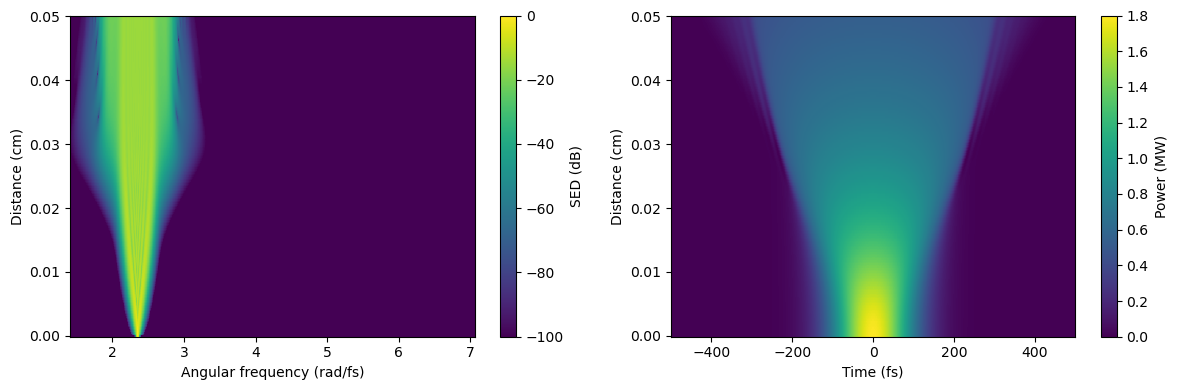

In [110]:
Plotting.prop_2D(output, :ω, dBmin=-100.0,  λrange=λlims, trange=(-500e-15, 500e-15), oversampling=1)

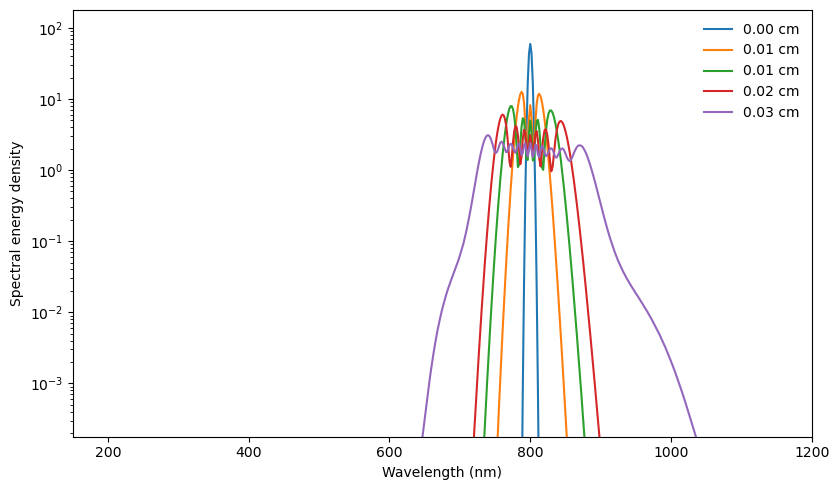

In [111]:
Plotting.spec_1D(output, [0, 0.01*LD, 0.02*LD, 0.03*LD, 0.06*LD]; log10=true)

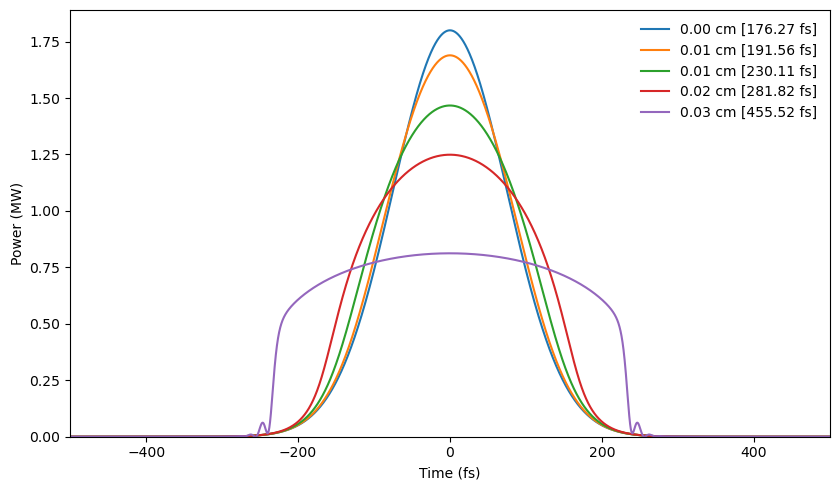

In [112]:
Plotting.time_1D(output, [0, 0.01*LD, 0.02*LD, 0.03*LD, 0.06*LD]; trange=(-500e-15, 500e-15))